In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import itertools
warnings.filterwarnings('ignore')

In [9]:
D=nx.read_edgelist("a1.csv",delimiter=',')

In [10]:
R = D.to_undirected()

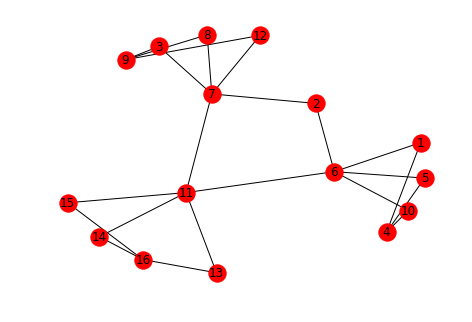

In [11]:
for node in R.nodes():
    if R.degree(node)==0:
        R.remove_node(node)
nx.draw(R,with_labels=True)
plt.show()

In [12]:
degree_dic={}
for node in R.nodes():
    degree_dic[node]=R.degree(node)
print(sorted(degree_dic.items(),key=lambda x:x[1],reverse=True))

[('6', 5), ('7', 5), ('11', 5), ('4', 3), ('9', 3), ('16', 3), ('1', 2), ('2', 2), ('3', 2), ('5', 2), ('8', 2), ('10', 2), ('12', 2), ('13', 2), ('15', 2), ('14', 2)]


In [13]:
nodepair=[]
for node in R.nodes():
    subpair=[]
    subpair.append(node)
    for i in R.nodes():
        if i not in subpair:
            subpair.append(i)
            for j in R.nodes():
                if j not in subpair:
                    subpair.append(j)
    nodepair.append(subpair)


nodepair=[i for i in itertools.combinations(R.nodes(), 3)]
#print (nodepair)

In [14]:
threshold=1/2
affect_result={}
for node in nodepair:
    num_of_affected_no_chg=False
    not_affected=R.nodes()
    affected=[]
    total=R.nodes()
    affected.append(node[0])
    affected.append(node[1])
    affected.append(node[2])
    NNN=0
    while num_of_affected_no_chg == False:
        num_of_affected_before=len(affected)
        for i in not_affected:
            num_of_all_neighbors=0
            num_of_affected_neighbors=0
            num_of_all_neighbors=len(R.neighbors(i))
            for j in R.neighbors(i):
                if j in affected:num_of_affected_neighbors+=1
            if num_of_affected_neighbors/num_of_all_neighbors>=threshold:
                if i in affected:pass
                else:affected.append(i)
                not_affected.remove(i)
        num_of_affected_after=len(affected)
        if num_of_affected_before==num_of_affected_after:NNN+=1
        if NNN>3:num_of_affected_no_chg=True
    affect_result[node]=len(affected)
    #print(affected)
print(sorted(affect_result.items(),key=lambda x:x[1],reverse=True))
print("total num of nodes {}".format(len(R.nodes())))

[(('1', '7', '11'), 16), (('1', '7', '16'), 16), (('1', '9', '11'), 16), (('1', '9', '16'), 16), (('4', '7', '11'), 16), (('4', '7', '13'), 16), (('4', '7', '15'), 16), (('4', '7', '16'), 16), (('4', '7', '14'), 16), (('4', '3', '11'), 16), (('4', '3', '16'), 16), (('4', '9', '11'), 16), (('4', '9', '13'), 16), (('4', '9', '15'), 16), (('4', '9', '16'), 16), (('4', '9', '14'), 16), (('4', '8', '11'), 16), (('4', '8', '16'), 16), (('4', '11', '12'), 16), (('4', '12', '16'), 16), (('6', '7', '11'), 16), (('6', '7', '13'), 16), (('6', '7', '15'), 16), (('6', '7', '16'), 16), (('6', '7', '14'), 16), (('6', '3', '11'), 16), (('6', '3', '16'), 16), (('6', '9', '11'), 16), (('6', '9', '13'), 16), (('6', '9', '15'), 16), (('6', '9', '16'), 16), (('6', '9', '14'), 16), (('6', '8', '11'), 16), (('6', '8', '16'), 16), (('6', '11', '12'), 16), (('6', '12', '16'), 16), (('7', '5', '11'), 16), (('7', '5', '16'), 16), (('7', '10', '11'), 16), (('7', '10', '16'), 16), (('9', '5', '11'), 16), (('9', '5